In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import os

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [23]:
# Load the odometry data
data_path = 'dataset/grandtour_raw/mission_2024-10-01-11-29-55/odometry_data_anymal.csv'

df = pd.read_csv(data_path)

# Display basic information about the data
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset shape: (3461, 8)

Column names:
['timestamp', 'x', 'y', 'z', 'qw', 'qx', 'qy', 'qz']

First few rows:
      timestamp         x         y         z        qw        qx        qy  \
0  1.727775e+09  0.000225 -0.000617 -0.000132  0.999892  0.005976 -0.013430   
1  1.727775e+09  0.000428 -0.000954 -0.000005  0.999892  0.005958 -0.013417   
2  1.727775e+09  0.000532 -0.000913 -0.000326  0.999893  0.005948 -0.013400   
3  1.727775e+09  0.000258 -0.001046 -0.000279  0.999893  0.005939 -0.013397   
4  1.727775e+09  0.000143 -0.000971 -0.000069  0.999893  0.005957 -0.013389   

             qz  
0  1.952991e-05  
1  2.846811e-06  
2 -5.519193e-06  
3 -8.104795e-07  
4 -3.743908e-06  

Data types:
timestamp    float64
x            float64
y            float64
z            float64
qw           float64
qx           float64
qy           float64
qz           float64
dtype: object


In [24]:
# Convert timestamp to datetime for better analysis
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], unit='s')

# Calculate trajectory statistics
x_range = df['x'].max() - df['x'].min()
y_range = df['y'].max() - df['y'].min()
z_range = df['z'].max() - df['z'].min()

print(f"Trajectory Statistics:")
print(f"X range: {x_range:.2f} meters")
print(f"Y range: {y_range:.2f} meters") 
print(f"Z range: {z_range:.2f} meters")
print(f"Total trajectory duration: {(df['timestamp'].max() - df['timestamp'].min()):.2f} seconds")
print(f"Number of data points: {len(df)}")

# Calculate distances between consecutive points
df['distance'] = np.sqrt(np.diff(df['x'], prepend=df['x'].iloc[0])**2 + 
                        np.diff(df['y'], prepend=df['y'].iloc[0])**2 + 
                        np.diff(df['z'], prepend=df['z'].iloc[0])**2)

total_distance = df['distance'].sum()
print(f"Total distance traveled: {total_distance:.2f} meters")

Trajectory Statistics:
X range: 101.04 meters
Y range: 47.22 meters
Z range: 2.90 meters
Total trajectory duration: 346.00 seconds
Number of data points: 3461
Total distance traveled: 204.73 meters


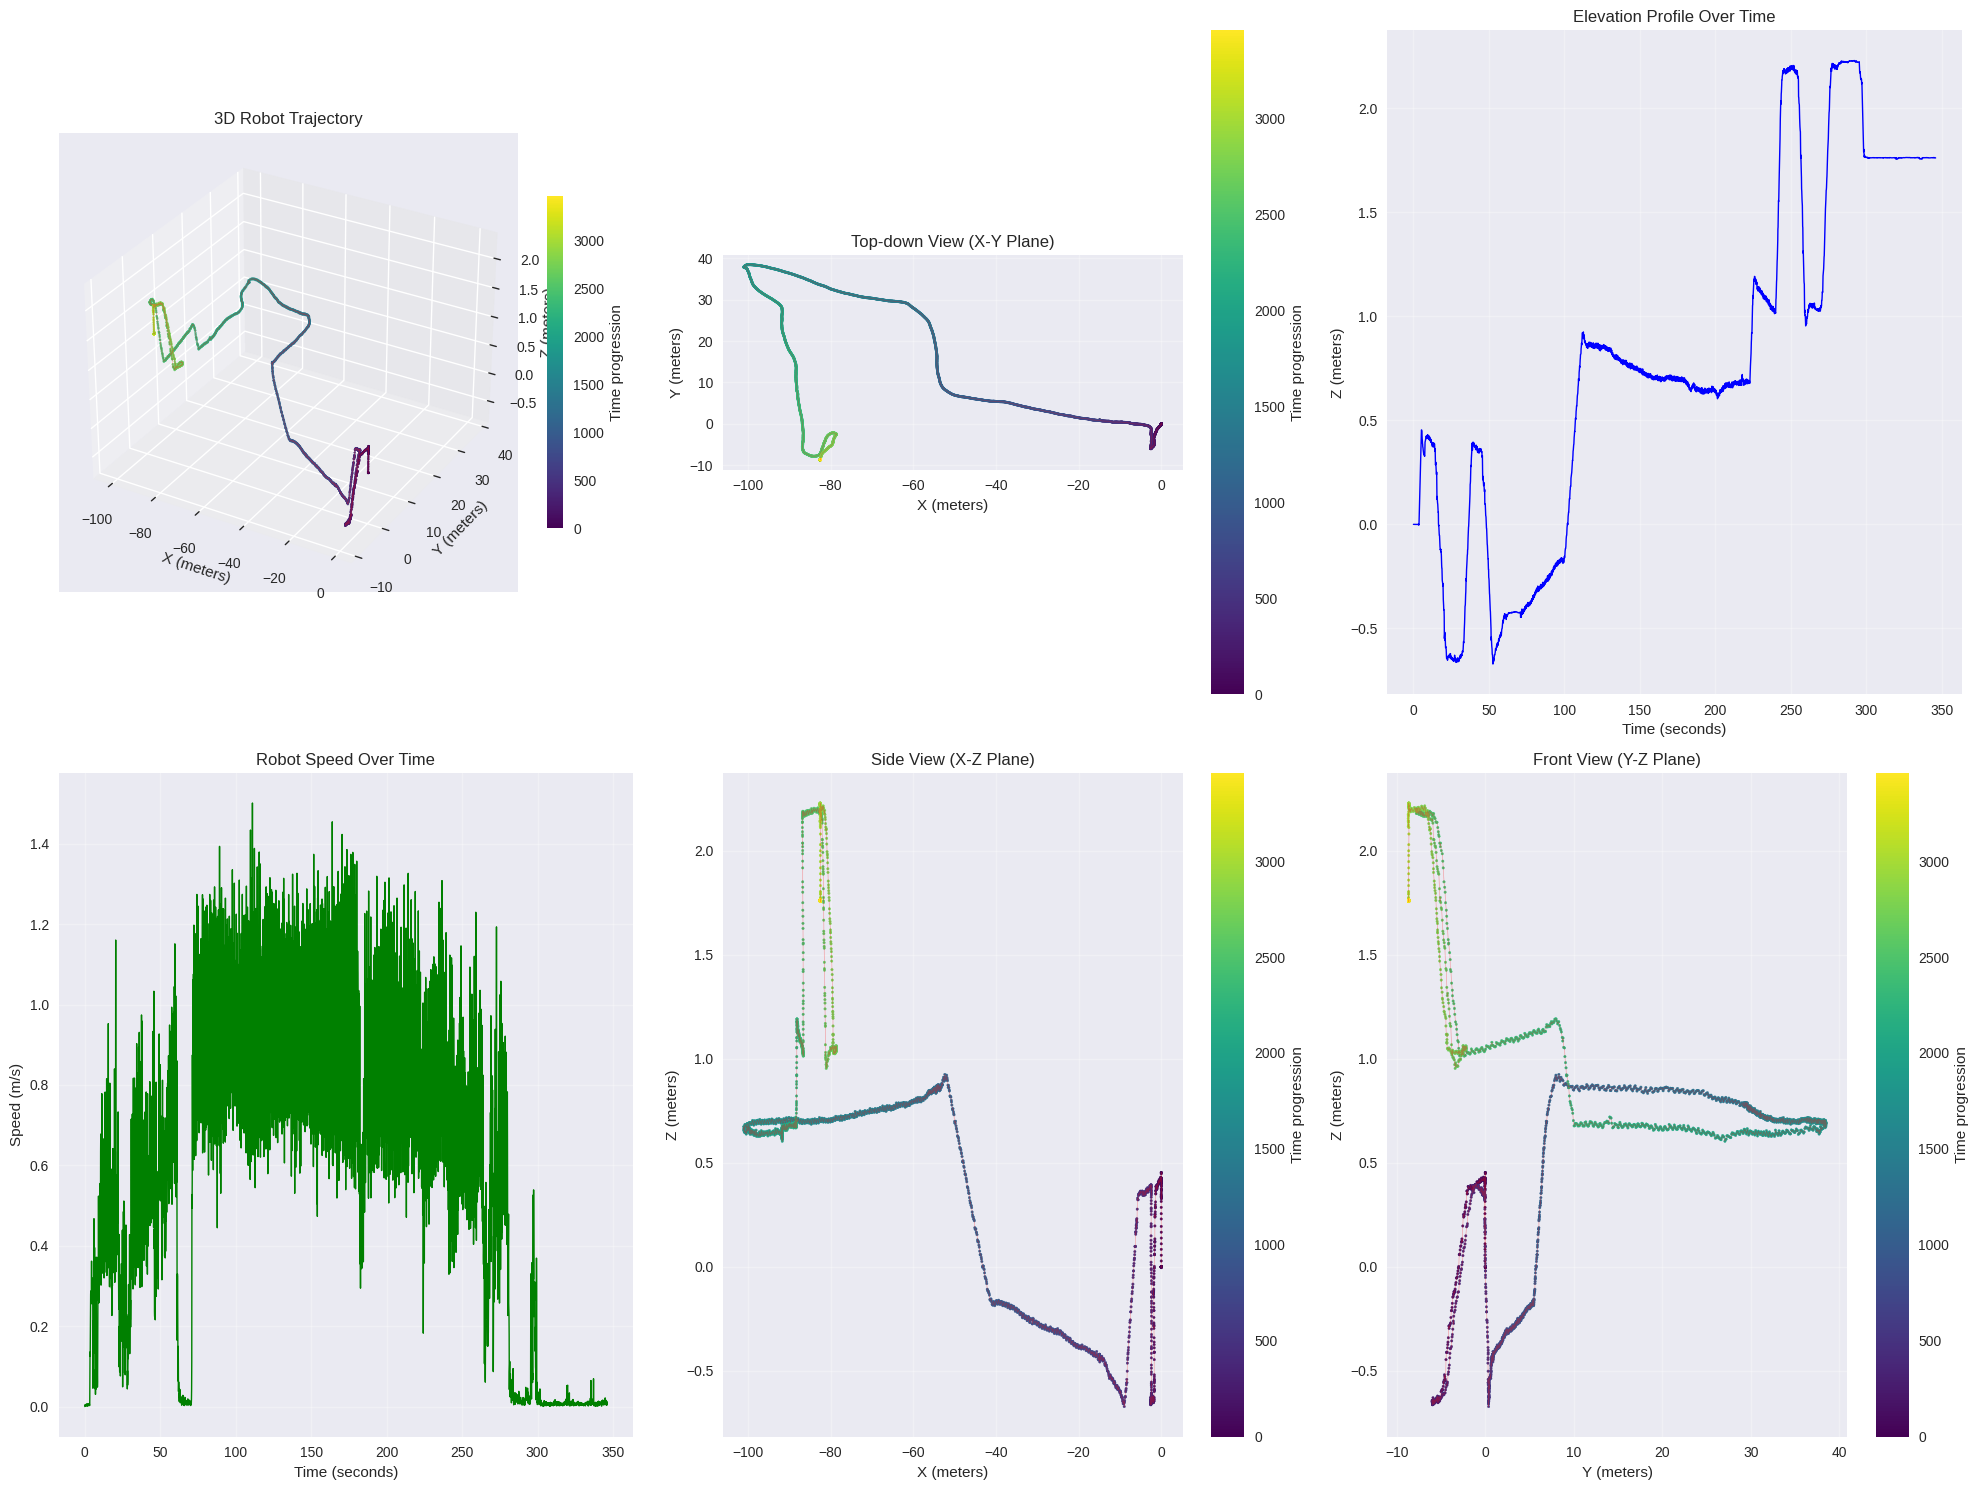

In [25]:
# Create comprehensive trajectory visualizations
fig = plt.figure(figsize=(20, 15))

# 1. 3D Trajectory Plot
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
scatter = ax1.scatter(df['x'], df['y'], df['z'], c=df.index, cmap='viridis', s=2)
ax1.plot(df['x'], df['y'], df['z'], 'r-', alpha=0.3, linewidth=0.5)
ax1.set_xlabel('X (meters)')
ax1.set_ylabel('Y (meters)')
ax1.set_zlabel('Z (meters)')
ax1.set_title('3D Robot Trajectory')
plt.colorbar(scatter, ax=ax1, label='Time progression', shrink=0.5)

# 2. 2D Top-down view (X-Y plane)
ax2 = fig.add_subplot(2, 3, 2)
scatter2 = ax2.scatter(df['x'], df['y'], c=df.index, cmap='viridis', s=3)
ax2.plot(df['x'], df['y'], 'r-', alpha=0.3, linewidth=0.5)
ax2.set_xlabel('X (meters)')
ax2.set_ylabel('Y (meters)')
ax2.set_title('Top-down View (X-Y Plane)')
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')
plt.colorbar(scatter2, ax=ax2, label='Time progression')

# 3. Elevation profile over time
ax3 = fig.add_subplot(2, 3, 3)
ax3.plot(df['timestamp'] - df['timestamp'].min(), df['z'], 'b-', linewidth=1)
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Z (meters)')
ax3.set_title('Elevation Profile Over Time')
ax3.grid(True, alpha=0.3)

# 4. Speed over time
ax4 = fig.add_subplot(2, 3, 4)
time_diff = np.diff(df['timestamp'], prepend=df['timestamp'].iloc[0])
speed = df['distance'] / time_diff
speed[time_diff == 0] = 0  # Handle division by zero
ax4.plot(df['timestamp'] - df['timestamp'].min(), speed, 'g-', linewidth=1)
ax4.set_xlabel('Time (seconds)')
ax4.set_ylabel('Speed (m/s)')
ax4.set_title('Robot Speed Over Time')
ax4.grid(True, alpha=0.3)

# 5. X-Z profile (side view)
ax5 = fig.add_subplot(2, 3, 5)
scatter5 = ax5.scatter(df['x'], df['z'], c=df.index, cmap='viridis', s=3)
ax5.plot(df['x'], df['z'], 'r-', alpha=0.3, linewidth=0.5)
ax5.set_xlabel('X (meters)')
ax5.set_ylabel('Z (meters)')
ax5.set_title('Side View (X-Z Plane)')
ax5.grid(True, alpha=0.3)
plt.colorbar(scatter5, ax=ax5, label='Time progression')

# 6. Y-Z profile (front view)
ax6 = fig.add_subplot(2, 3, 6)
scatter6 = ax6.scatter(df['y'], df['z'], c=df.index, cmap='viridis', s=3)
ax6.plot(df['y'], df['z'], 'r-', alpha=0.3, linewidth=0.5)
ax6.set_xlabel('Y (meters)')
ax6.set_ylabel('Z (meters)')
ax6.set_title('Front View (Y-Z Plane)')
ax6.grid(True, alpha=0.3)
plt.colorbar(scatter6, ax=ax6, label='Time progression')

plt.tight_layout()
plt.show()

In [28]:


# Calculate Euler angles from quaternions (simplified - just yaw for heading)
def quaternion_to_yaw(qw, qx, qy, qz):
    """Convert quaternion to yaw angle (heading)"""
    return np.arctan2(2 * (qw * qz + qx * qy), 1 - 2 * (qy**2 + qz**2))

df['yaw'] = quaternion_to_yaw(df['qw'], df['qx'], df['qy'], df['qz'])
df['yaw_degrees'] = np.degrees(df['yaw'])

In [29]:
# Analyze goal-directed movement using distance-based moving window
import math

def calculate_goal_directed_movement_distance_based(df, goal_distance=10.0):
    """
    Analyze when the robot is moving away from the goal using a distance-based moving window.
    Goal is defined as the robot's position that is goal_distance meters ahead along the trajectory.
    """
    results = []
    
    # Pre-calculate cumulative distances for efficiency
    cumulative_distances = [0]
    for i in range(1, len(df)):
        dx = df['x'].iloc[i] - df['x'].iloc[i-1]
        dy = df['y'].iloc[i] - df['y'].iloc[i-1]
        dist = math.sqrt(dx**2 + dy**2)
        cumulative_distances.append(cumulative_distances[-1] + dist)
    
    for idx in range(len(df) - 1):
        current_row = df.iloc[idx]
        next_row = df.iloc[idx + 1]
        
        # Current position
        curr_x, curr_y = current_row['x'], current_row['y']
        current_cumulative_dist = cumulative_distances[idx]
        
        # Find the goal position (goal_distance meters ahead along trajectory)
        target_distance = current_cumulative_dist + goal_distance
        
        # Find the closest point that is at least goal_distance ahead
        goal_idx = None
        goal_x, goal_y = None, None
        
        for j in range(idx + 1, len(df)):
            if cumulative_distances[j] >= target_distance:
                goal_idx = j
                goal_x = df['x'].iloc[j]
                goal_y = df['y'].iloc[j]
                break
        
        # If we can't find a point goal_distance ahead, use the last point
        if goal_idx is None:
            goal_idx = len(df) - 1
            goal_x = df['x'].iloc[-1]
            goal_y = df['y'].iloc[-1]
        
        # Movement direction vector (robot's current movement)
        movement_dx = next_row['x'] - curr_x
        movement_dy = next_row['y'] - curr_y
        
        # Vector to goal
        goal_dx = goal_x - curr_x
        goal_dy = goal_y - curr_y
        
        # Calculate angle between movement direction and goal direction
        if movement_dx == 0 and movement_dy == 0:
            # No movement
            angle_diff = 0
            moving_away = False
        else:
            # Use simple dot product
            movement_vec = np.array([movement_dx, movement_dy])
            goal_vec = np.array([goal_dx, goal_dy])
            
            # Normalize vectors for angle calculation
            movement_mag = np.linalg.norm(movement_vec)
            goal_mag = np.linalg.norm(goal_vec)
            
            if movement_mag > 0 and goal_mag > 0:
                # Normalized dot product gives cos(angle)
                cos_angle = np.dot(movement_vec, goal_vec) / (movement_mag * goal_mag)
                
                # Calculate actual angle for recording purposes
                cos_angle_clamped = np.clip(cos_angle, -1, 1)
                angle_diff = np.degrees(np.arccos(cos_angle_clamped))
                
                # Moving away if dot product < 0 (angle > 90 degrees)
                moving_away = cos_angle < 0
            else:
                angle_diff = 0
                moving_away = False
        
        # Calculate actual distance to goal position
        actual_distance_to_goal = math.sqrt(goal_dx**2 + goal_dy**2)
        
        # Calculate distance along trajectory to goal
        trajectory_distance_to_goal = cumulative_distances[goal_idx] - current_cumulative_dist
        
        results.append({
            'point_idx': idx,
            'timestamp': current_row['timestamp'],
            'x': curr_x,
            'y': curr_y,
            'goal_x': goal_x,
            'goal_y': goal_y,
            'goal_idx': goal_idx,
            'movement_dx': movement_dx,
            'movement_dy': movement_dy,
            'goal_dx': goal_dx,
            'goal_dy': goal_dy,
            'angle_to_goal': angle_diff,
            'moving_away': moving_away,
            'euclidean_distance_to_goal': actual_distance_to_goal,
            'trajectory_distance_to_goal': trajectory_distance_to_goal
        })
    
    return pd.DataFrame(results)

# Analyze goal-directed movement using distance-based moving window
goal_distance = 10.0  # meters ahead along trajectory
print(f"Analyzing goal-directed movement with {goal_distance}m distance-based moving window...")
movement_analysis = calculate_goal_directed_movement_distance_based(df, goal_distance=goal_distance)

print(f"\nMovement Analysis Results:")
print(f"Total analyzed points: {len(movement_analysis)}")
print(f"Points moving away from goal: {movement_analysis['moving_away'].sum()}")
print(f"Percentage moving away: {movement_analysis['moving_away'].mean()*100:.1f}%")

# Basic statistics
print(f"\nDistance-based Goal Analysis:")
print(f"Target distance ahead: {goal_distance:.1f}m")
print(f"Average euclidean distance to goal: {movement_analysis['euclidean_distance_to_goal'].mean():.2f}m")
print(f"Average trajectory distance to goal: {movement_analysis['trajectory_distance_to_goal'].mean():.2f}m")
print(f"Average angle to goal: {movement_analysis['angle_to_goal'].mean():.1f}°")

# Analyze patterns over time
time_bins = 10
time_duration = df['timestamp'].max() - df['timestamp'].min()
bin_duration = time_duration / time_bins

print(f"\nTemporal Analysis (in {time_bins} time bins):")
for i in range(time_bins):
    start_time = df['timestamp'].min() + i * bin_duration
    end_time = start_time + bin_duration
    
    mask = ((movement_analysis['timestamp'] >= start_time) & 
            (movement_analysis['timestamp'] < end_time))
    bin_data = movement_analysis[mask]
    
    if len(bin_data) > 0:
        pct_away = bin_data['moving_away'].mean() * 100
        avg_angle = bin_data['angle_to_goal'].mean()
        print(f"  Time bin {i}: {pct_away:.1f}% moving away, avg angle: {avg_angle:.1f}°")

print(f"\nGoal Distance Analysis:")
print(f"Min trajectory distance to goal: {movement_analysis['trajectory_distance_to_goal'].min():.2f}m")
print(f"Max trajectory distance to goal: {movement_analysis['trajectory_distance_to_goal'].max():.2f}m")
print(f"Points where goal is at trajectory end: {(movement_analysis['goal_idx'] == len(df)-1).sum()}")
print(f"Percentage using trajectory end as goal: {(movement_analysis['goal_idx'] == len(df)-1).mean()*100:.1f}%")

Analyzing goal-directed movement with 10.0m distance-based moving window...

Movement Analysis Results:
Total analyzed points: 3460
Points moving away from goal: 650
Percentage moving away: 18.8%

Distance-based Goal Analysis:
Target distance ahead: 10.0m
Average euclidean distance to goal: 6.77m
Average trajectory distance to goal: 8.01m
Average angle to goal: 43.3°

Temporal Analysis (in 10 time bins):
  Time bin 0: 50.6% moving away, avg angle: 88.9°
  Time bin 1: 10.7% moving away, avg angle: 34.5°
  Time bin 2: 2.0% moving away, avg angle: 9.4°
  Time bin 3: 0.0% moving away, avg angle: 22.4°
  Time bin 4: 0.0% moving away, avg angle: 5.8°
  Time bin 5: 10.7% moving away, avg angle: 36.7°
  Time bin 6: 1.4% moving away, avg angle: 15.9°
  Time bin 7: 37.6% moving away, avg angle: 71.0°
  Time bin 8: 36.7% moving away, avg angle: 72.5°
  Time bin 9: 38.3% moving away, avg angle: 76.3°

Goal Distance Analysis:
Min trajectory distance to goal: 0.00m
Max trajectory distance to goal: 1

## Analysis Summary

The analysis identifies when the robot is moving away from its **distance-based goal** using a moving window approach:

- **cos(angle) < 0** → angle > 90° → moving away from goal
- **cos(angle) ≥ 0** → angle ≤ 90° → moving toward goal

This approach uses a moving window where the goal is the robot's position that is a fixed distance (e.g., 10 meters) ahead along the actual trajectory path. This provides continuous analysis without trajectory segmentation and gives insights into how well the robot's current movement aligns with its near-future path, helping to identify when the robot is taking detours or inefficient routes.

/tmp/ipykernel_1061717/4206962313.py:48: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/scratch/cluster/carlq/miniconda3/envs/nav/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/scratch/cluster/carlq/miniconda3/envs/nav/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


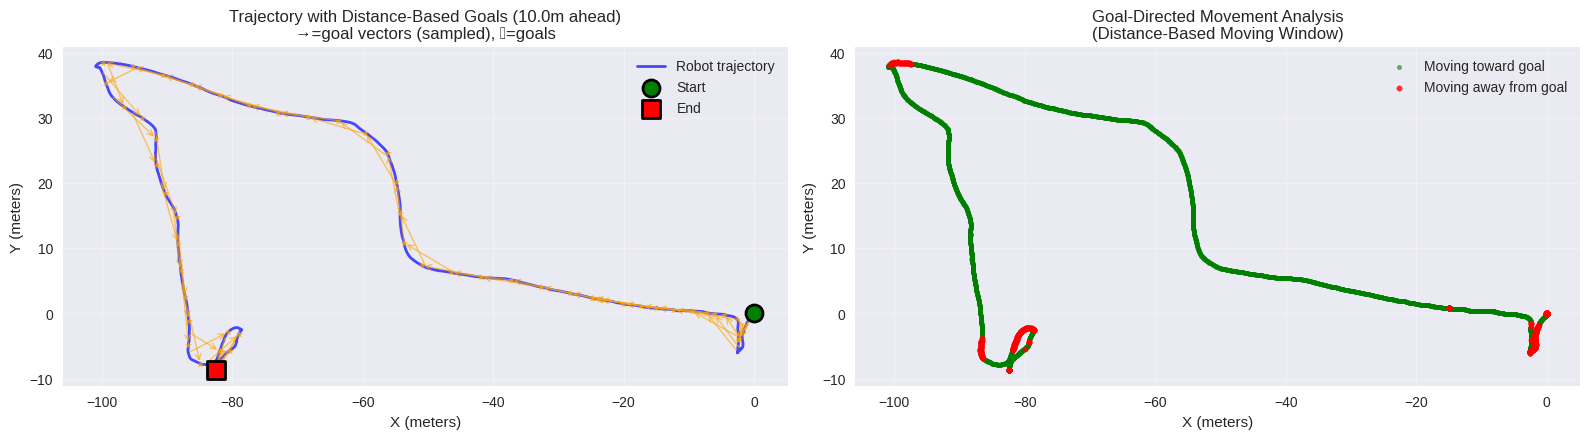

In [30]:
# Visualize trajectory and distance-based goal-directed movement analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# 1. Trajectory with distance-based goals
ax1.plot(df['x'], df['y'], 'blue', linewidth=2, alpha=0.7, label='Robot trajectory')

# Show start and end points
ax1.scatter(df['x'].iloc[0], df['y'].iloc[0], color='green', s=150, marker='o', 
           edgecolor='black', linewidth=2, zorder=5, label='Start')
ax1.scatter(df['x'].iloc[-1], df['y'].iloc[-1], color='red', s=150, marker='s', 
           edgecolor='black', linewidth=2, zorder=5, label='End')

# Show sample goal vectors (every Nth point to avoid clutter)
sample_points = movement_analysis[::50]  # Sample every 50th point
for _, point in sample_points.iterrows():
    # Draw arrow from current position to distance-based goal
    ax1.annotate('', xy=(point['goal_x'], point['goal_y']), 
                xytext=(point['x'], point['y']),
                arrowprops=dict(arrowstyle='->', color='orange', alpha=0.6, lw=1))
    
    # Mark the goal position
    ax1.scatter(point['goal_x'], point['goal_y'], color='orange', s=20, 
               marker='*', alpha=0.7, zorder=4)

ax1.set_xlabel('X (meters)')
ax1.set_ylabel('Y (meters)')
ax1.set_title(f'Trajectory with Distance-Based Goals ({goal_distance}m ahead)\n→=goal vectors (sampled), ★=goals')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# 2. Points moving away from goal highlighted
moving_away_data = movement_analysis[movement_analysis['moving_away']]
moving_toward_data = movement_analysis[~movement_analysis['moving_away']]

ax2.scatter(moving_toward_data['x'], moving_toward_data['y'], 
           c='green', s=10, alpha=0.6, label='Moving toward goal')
ax2.scatter(moving_away_data['x'], moving_away_data['y'], 
           c='red', s=15, alpha=0.8, label='Moving away from goal')

ax2.set_xlabel('X (meters)')
ax2.set_ylabel('Y (meters)')
ax2.set_title('Goal-Directed Movement Analysis\n(Distance-Based Moving Window)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()

In [31]:
# Calculate angular velocity and identify sudden rotations
import numpy as np

# Calculate angular velocity from yaw data
def calculate_angular_velocity(df):
    """Calculate angular velocity from yaw angles and timestamps"""
    angular_velocities = []
    
    for i in range(1, len(df)):
        # Calculate yaw difference (handling wrap-around at ±π)
        yaw_diff = df['yaw'].iloc[i] - df['yaw'].iloc[i-1]
        
        # Handle wrap-around: if difference > π, subtract 2π; if < -π, add 2π
        if yaw_diff > np.pi:
            yaw_diff -= 2 * np.pi
        elif yaw_diff < -np.pi:
            yaw_diff += 2 * np.pi
            
        # Calculate time difference
        time_diff = df['timestamp'].iloc[i] - df['timestamp'].iloc[i-1]
        
        # Calculate angular velocity (rad/s)
        if time_diff > 0:
            angular_vel = yaw_diff / time_diff
        else:
            angular_vel = 0
            
        angular_velocities.append(angular_vel)
    
    # Add first element as 0 (no previous point to compare)
    angular_velocities.insert(0, 0)
    
    return np.array(angular_velocities)

# Calculate angular velocity
df['angular_velocity'] = calculate_angular_velocity(df)
df['angular_velocity_deg'] = np.degrees(df['angular_velocity'])

# Set threshold for sudden rotations (in degrees/second)
angular_velocity_threshold = 20.0  # degrees per second

# Identify sudden rotations
df['sudden_rotation'] = np.abs(df['angular_velocity_deg']) > angular_velocity_threshold

print("=" * 60)
print("ANGULAR VELOCITY ANALYSIS")
print("=" * 60)

print(f"\nAngular Velocity Statistics:")
print(f"• Mean angular velocity: {np.mean(np.abs(df['angular_velocity_deg'])):.2f} deg/s")
print(f"• Max angular velocity: {np.max(np.abs(df['angular_velocity_deg'])):.2f} deg/s")
print(f"• Std angular velocity: {np.std(df['angular_velocity_deg']):.2f} deg/s")

print(f"\nSudden Rotation Analysis (threshold: {angular_velocity_threshold} deg/s):")
sudden_rotation_count = df['sudden_rotation'].sum()
sudden_rotation_percentage = (sudden_rotation_count / len(df)) * 100
print(f"• Points with sudden rotations: {sudden_rotation_count} / {len(df)} ({sudden_rotation_percentage:.1f}%)")

# Find continuous segments of sudden rotations
rotation_segments = []
in_rotation = False
start_idx = None

for i, is_rotating in enumerate(df['sudden_rotation']):
    if is_rotating and not in_rotation:
        # Start of rotation segment
        in_rotation = True
        start_idx = i
    elif not is_rotating and in_rotation:
        # End of rotation segment
        in_rotation = False
        rotation_segments.append((start_idx, i-1))
    elif i == len(df) - 1 and in_rotation:
        # End of data while in rotation
        rotation_segments.append((start_idx, i))

print(f"• Number of rotation segments: {len(rotation_segments)}")



ANGULAR VELOCITY ANALYSIS

Angular Velocity Statistics:
• Mean angular velocity: 5.56 deg/s
• Max angular velocity: 53.22 deg/s
• Std angular velocity: 9.39 deg/s

Sudden Rotation Analysis (threshold: 20.0 deg/s):
• Points with sudden rotations: 217 / 3461 (6.3%)
• Number of rotation segments: 46


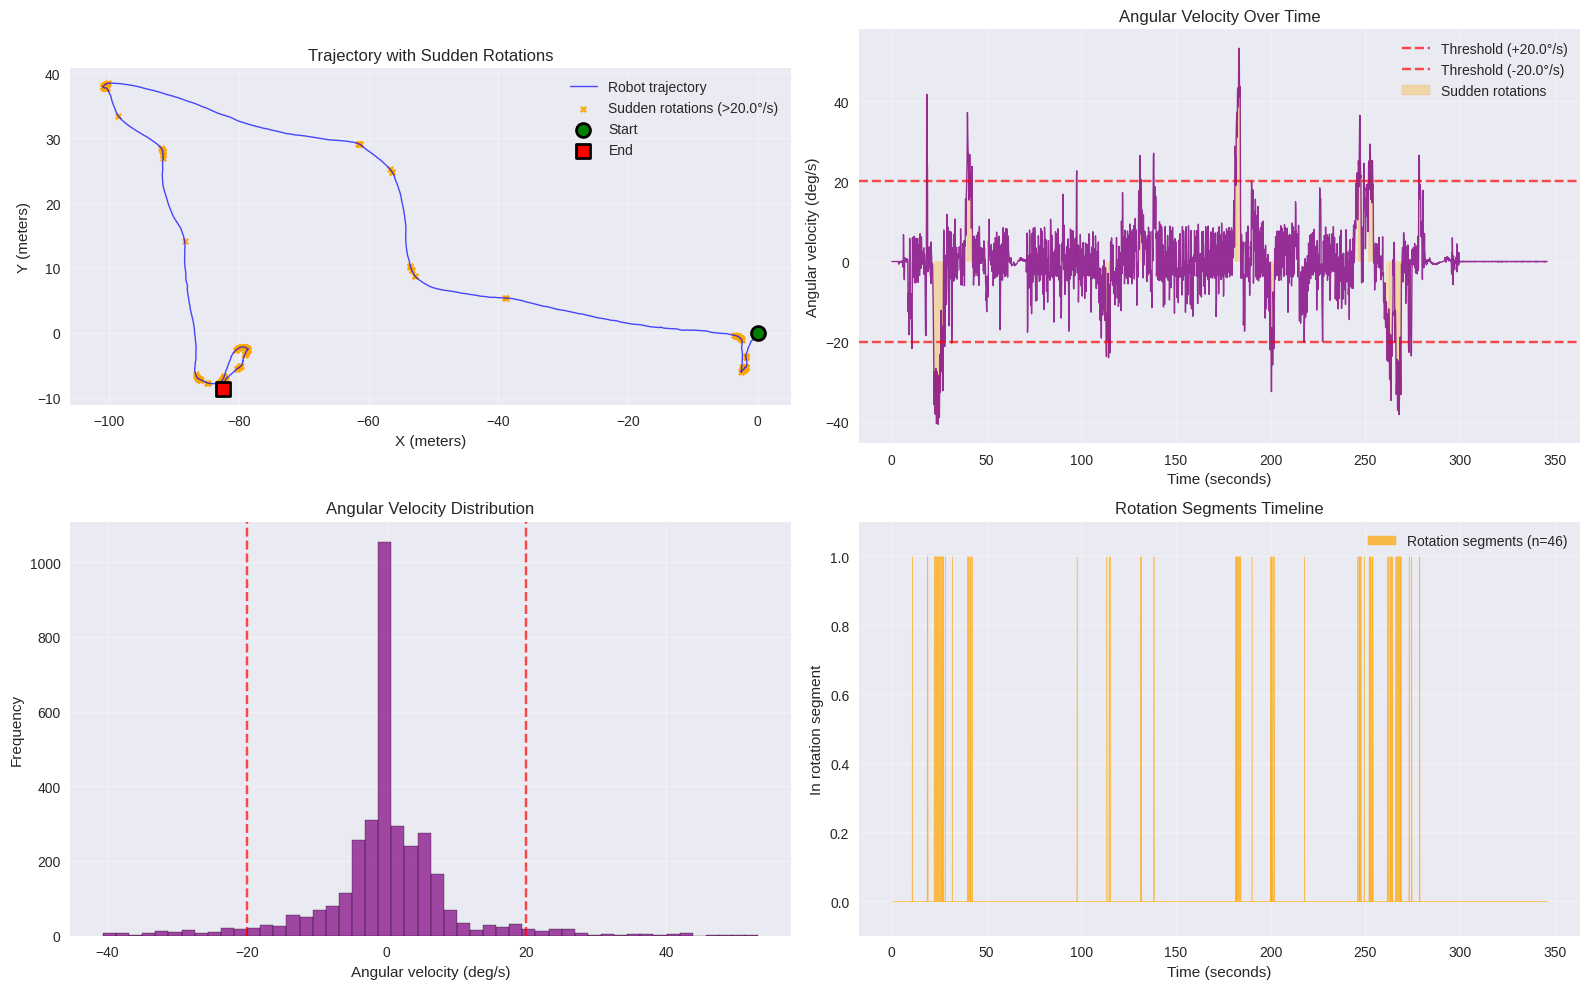


📊 ANGULAR VELOCITY ANALYSIS SUMMARY:
• Total trajectory points: 3461
• Points with sudden rotations: 217 (6.3%)
• Number of rotation segments: 46
• Average rotation segment duration: 0.37 seconds
• Average max angular velocity in segments: 27.0 deg/s


In [32]:
# Enhanced visualization with angular velocity and sudden rotations
fig = plt.figure(figsize=(16, 10))

# 1. Trajectory with sudden rotations
ax1 = plt.subplot(2, 2, 1)
# Plot main trajectory
ax1.plot(df['x'], df['y'], 'blue', linewidth=1, alpha=0.7, label='Robot trajectory')

# Highlight sudden rotations
sudden_rotation_data = df[df['sudden_rotation']]
ax1.scatter(sudden_rotation_data['x'], sudden_rotation_data['y'], 
           c='orange', s=15, alpha=0.9, marker='x', label=f'Sudden rotations (>{angular_velocity_threshold}°/s)')

# Mark start and end
ax1.scatter(df['x'].iloc[0], df['y'].iloc[0], color='green', s=100, marker='o', 
           edgecolor='black', linewidth=2, zorder=5, label='Start')
ax1.scatter(df['x'].iloc[-1], df['y'].iloc[-1], color='red', s=100, marker='s', 
           edgecolor='black', linewidth=2, zorder=5, label='End')

ax1.set_xlabel('X (meters)')
ax1.set_ylabel('Y (meters)')
ax1.set_title('Trajectory with Sudden Rotations')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# 2. Angular velocity over time
ax2 = plt.subplot(2, 2, 2)
time_relative = df['timestamp'] - df['timestamp'].min()
ax2.plot(time_relative, df['angular_velocity_deg'], 'purple', linewidth=1, alpha=0.8)
ax2.axhline(y=angular_velocity_threshold, color='red', linestyle='--', alpha=0.7, 
           label=f'Threshold (+{angular_velocity_threshold}°/s)')
ax2.axhline(y=-angular_velocity_threshold, color='red', linestyle='--', alpha=0.7, 
           label=f'Threshold (-{angular_velocity_threshold}°/s)')
ax2.fill_between(time_relative, df['angular_velocity_deg'], 
                where=np.abs(df['angular_velocity_deg']) > angular_velocity_threshold,
                alpha=0.3, color='orange', label='Sudden rotations')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Angular velocity (deg/s)')
ax2.set_title('Angular Velocity Over Time')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Angular velocity histogram
ax3 = plt.subplot(2, 2, 3)
ax3.hist(df['angular_velocity_deg'], bins=50, alpha=0.7, color='purple', edgecolor='black')
ax3.axvline(x=angular_velocity_threshold, color='red', linestyle='--', alpha=0.7)
ax3.axvline(x=-angular_velocity_threshold, color='red', linestyle='--', alpha=0.7)
ax3.set_xlabel('Angular velocity (deg/s)')
ax3.set_ylabel('Frequency')
ax3.set_title('Angular Velocity Distribution')
ax3.grid(True, alpha=0.3)

# 4. Rotation segments visualization
ax4 = plt.subplot(2, 2, 4)
if len(rotation_segments) > 0:
    # Create a timeline showing rotation segments
    timeline = np.zeros(len(df))
    for start_idx, end_idx in rotation_segments:
        timeline[start_idx:end_idx+1] = 1
    
    ax4.fill_between(time_relative, timeline, alpha=0.7, color='orange', 
                     label=f'Rotation segments (n={len(rotation_segments)})')
    ax4.set_xlabel('Time (seconds)')
    ax4.set_ylabel('In rotation segment')
    ax4.set_title('Rotation Segments Timeline')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.set_ylim(-0.1, 1.1)
else:
    ax4.text(0.5, 0.5, 'No rotation segments found', 
             transform=ax4.transAxes, ha='center', va='center')
    ax4.set_title('Rotation Segments Timeline')

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n📊 ANGULAR VELOCITY ANALYSIS SUMMARY:")
print(f"• Total trajectory points: {len(df)}")
print(f"• Points with sudden rotations: {sudden_rotation_count} ({sudden_rotation_percentage:.1f}%)")
print(f"• Number of rotation segments: {len(rotation_segments)}")

if len(rotation_segments) > 0:
    segment_durations = []
    max_angular_vels = []
    
    for start, end in rotation_segments:
        duration = df['timestamp'].iloc[end] - df['timestamp'].iloc[start]
        max_angular_vel = np.max(np.abs(df['angular_velocity_deg'].iloc[start:end+1]))
        segment_durations.append(duration)
        max_angular_vels.append(max_angular_vel)
    
    print(f"• Average rotation segment duration: {np.mean(segment_durations):.2f} seconds")
    print(f"• Average max angular velocity in segments: {np.mean(max_angular_vels):.1f} deg/s")

Loading video from: dataset/grandtour_raw/mission_2024-10-01-11-29-55/front_camera_lossy.mp4
Camera intrinsics loaded. Image size: (1080, 1440)
Video has 3472 frames
Movement analysis has 3460 points
Estimated FPS: 10.03
Video duration: 346.0 seconds
Found 6 segments where robot is moving away from goal

Segment 1: Points 143 to 224 (length: 81)
  Time range: 14.3s to 22.4s

Segment 2: Points 2558 to 2633 (length: 75)
  Time range: 255.8s to 263.3s

Segment 3: Points 2419 to 2462 (length: 43)
  Time range: 241.9s to 246.2s

Segment 4: Points 1781 to 1816 (length: 35)
  Time range: 178.1s to 181.6s


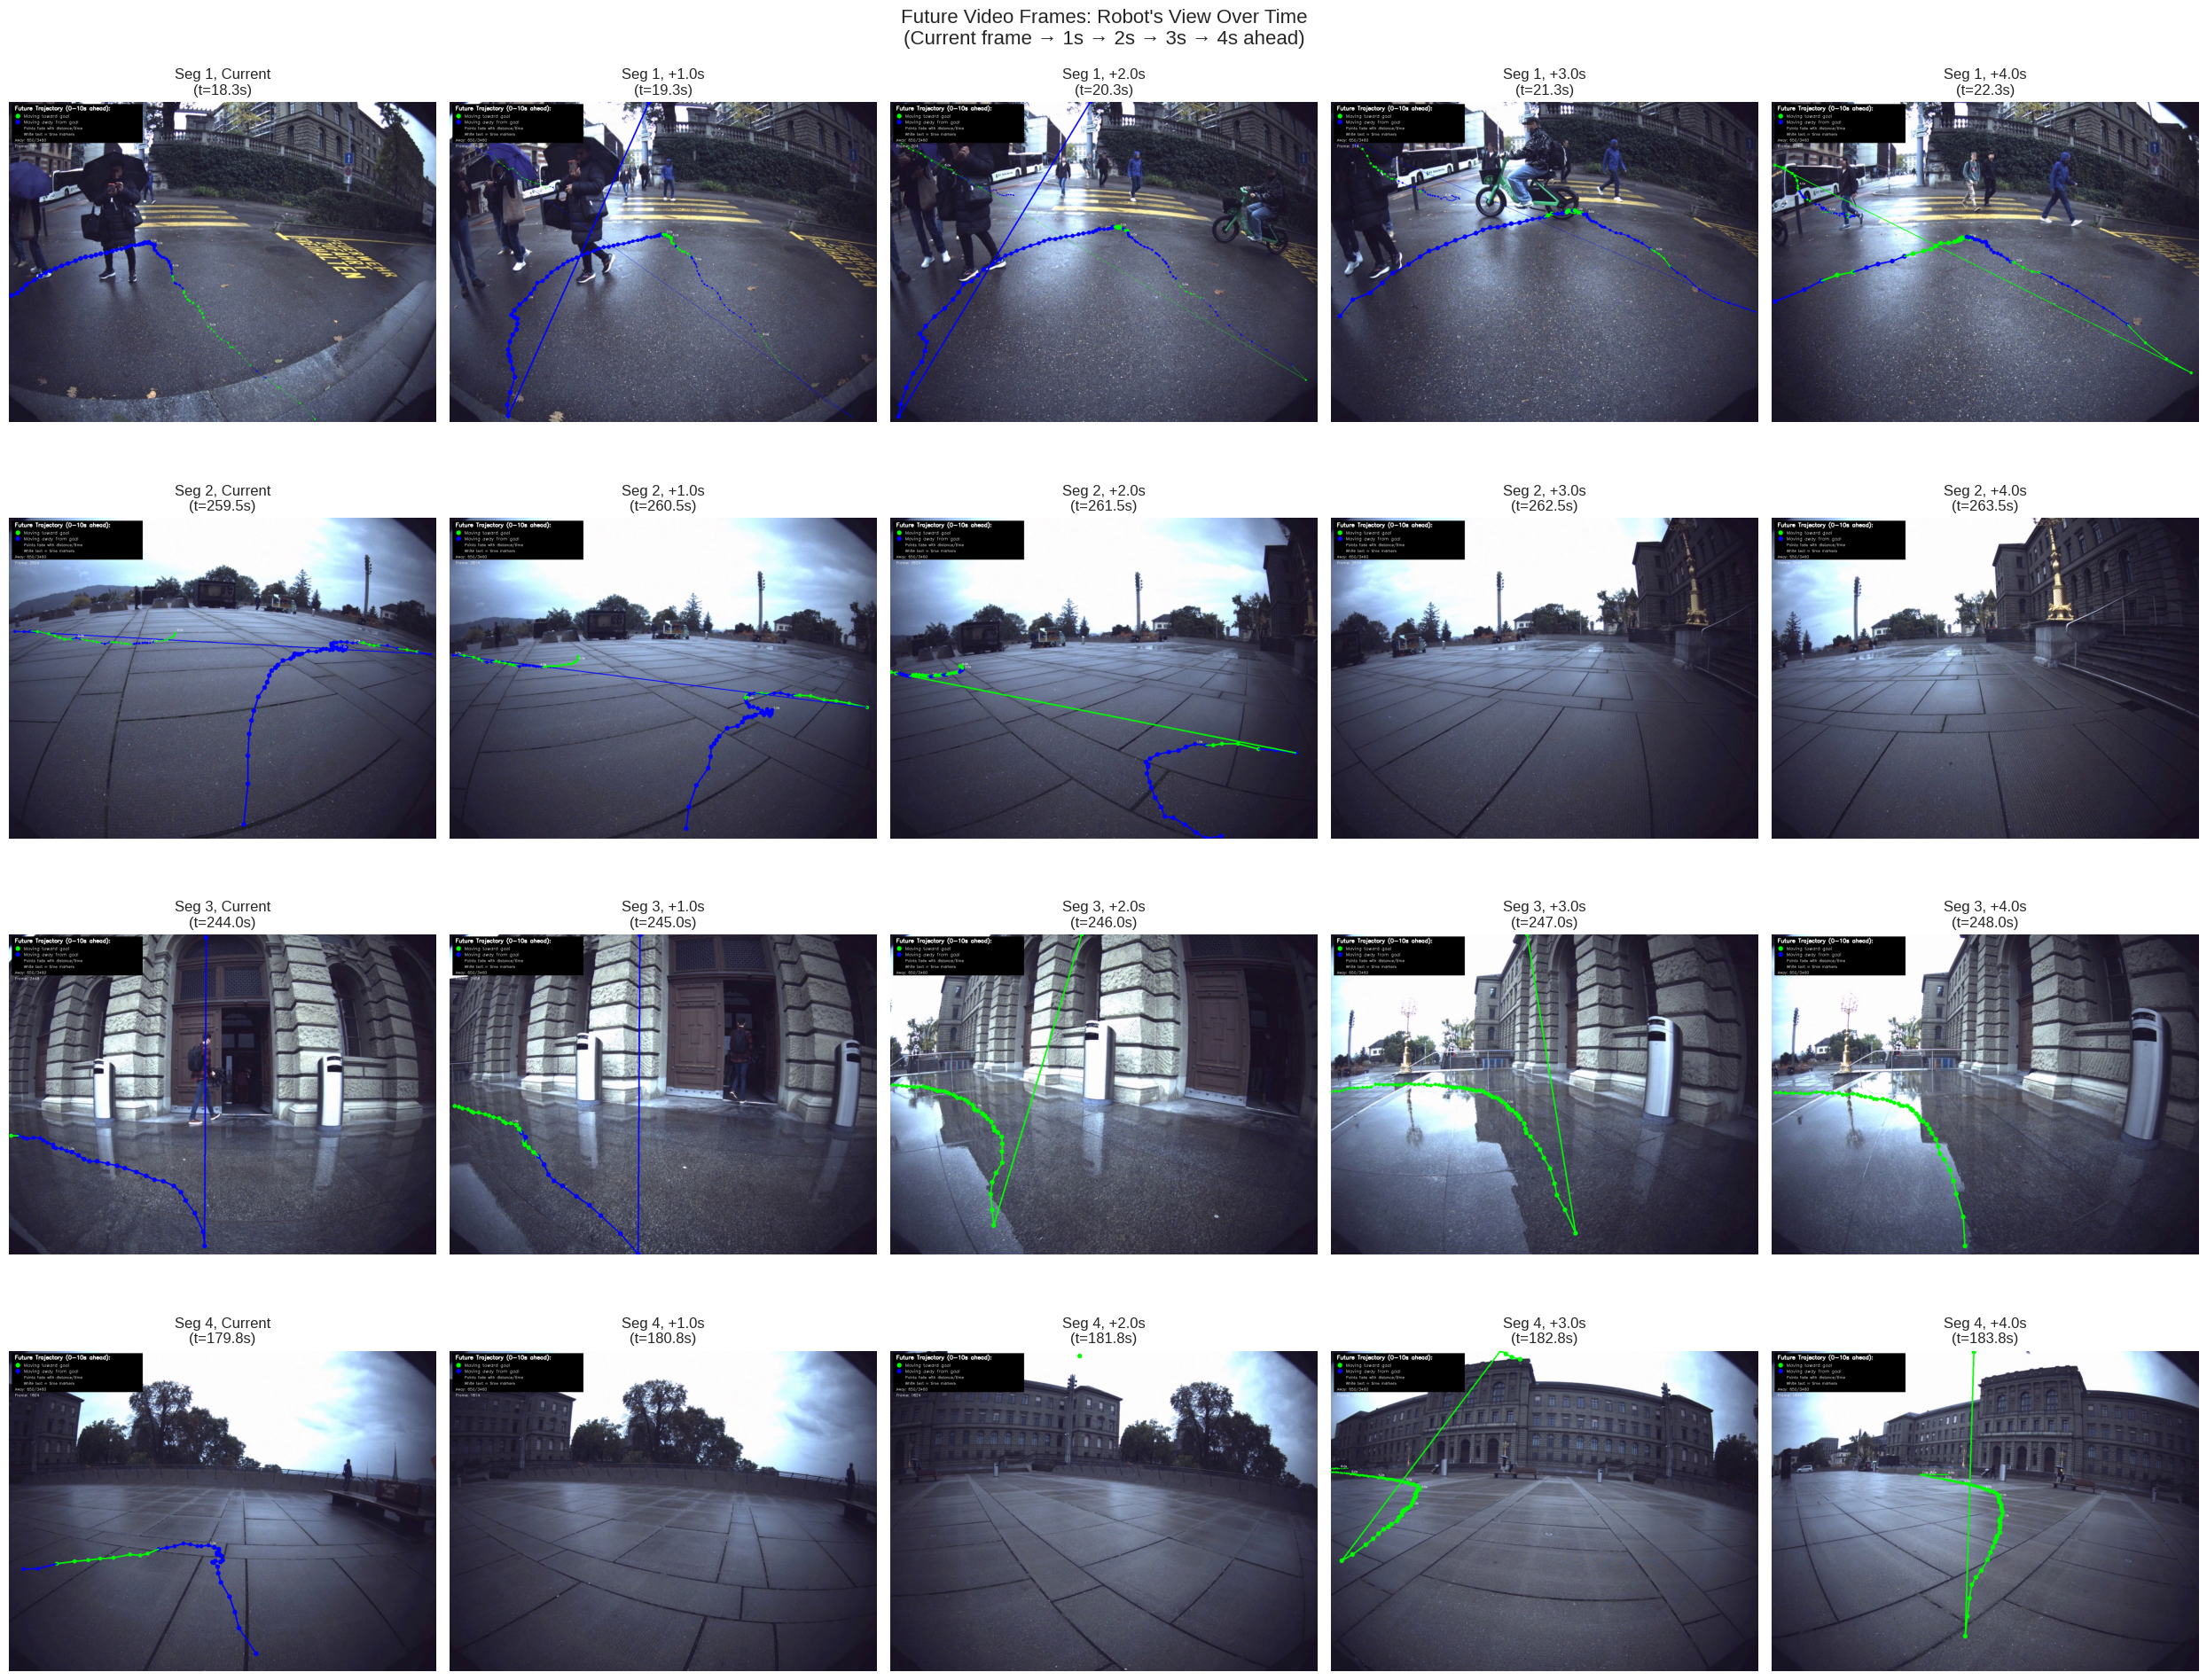


📊 MOVING AWAY SEGMENTS SUMMARY:
  1. Time 14.3s-22.4s: 8.1s duration, avg angle 136.1°, avg distance 4.0m
  2. Time 255.8s-263.3s: 7.5s duration, avg angle 147.0°, avg distance 4.1m
  3. Time 241.9s-246.2s: 4.3s duration, avg angle 106.1°, avg distance 6.2m
  4. Time 178.1s-181.6s: 3.5s duration, avg angle 106.8°, avg distance 7.2m
  5. Time 4.4s-5.4s: 1.0s duration, avg angle 144.7°, avg distance 4.6m


In [40]:
# Video visualization of segments where robot is moving away from goal
from pathlib import Path
from decord import VideoReader, cpu
import cv2
from cotnav.geometry.camera import project_to_pixel
from cotnav.utils.loader_utils import load_intrinsics, load_odom, load_timestamps, build_transforms
from cotnav.utils.math_utils import interpolate_se3, se3_matrix

try:
    # Load video and related data
    mission_dir = Path(data_path).parent
    video_path = mission_dir / "front_camera_lossy.mp4"
    info_path = mission_dir / "front_camera_info_anymal.yaml"
    tf_path = mission_dir / "tf_static_anymal.yaml"
    ts_path = mission_dir / "front_camera_timestamps_anymal.csv"
    odom_path = mission_dir / "odometry_data_anymal.csv"
    
    if not video_path.exists():
        print(f"Video file not found at {video_path}")
        print("Available files in mission directory:")
        if mission_dir.exists():
            for f in mission_dir.iterdir():
                if f.suffix in ['.mp4', '.avi', '.mov']:
                    print(f"  - {f.name}")
    else:
        print(f"Loading video from: {video_path}")
        
        # Load data using vlmtesting functions
        odom = load_odom(odom_path)
        calib = load_intrinsics(info_path, tf_path, world_frame="base")
        cam_ts = load_timestamps(ts_path)
        interp_odom = interpolate_se3(cam_ts, odom[:, 0], odom[:, 1:4], odom[:, 4:8])
        tm = build_transforms(tf_path)
        
        print(f"Camera intrinsics loaded. Image size: {calib.size_hw}")
        
        # Load video
        vr = VideoReader(str(video_path), ctx=cpu(0))
        total_frames = len(vr)
        
        print(f"Video has {total_frames} frames")
        print(f"Movement analysis has {len(movement_analysis)} points")
        
        # Calculate frame rate and video duration
        video_duration = df['timestamp'].max() - df['timestamp'].min()
        estimated_fps = total_frames / video_duration
        
        print(f"Estimated FPS: {estimated_fps:.2f}")
        print(f"Video duration: {video_duration:.1f} seconds")
        
        # Function to map timestamp to frame index
        def timestamp_to_frame(timestamp, start_time, fps, total_frames):
            elapsed_time = timestamp - start_time
            frame_idx = int(elapsed_time * fps)
            return max(0, min(frame_idx, total_frames - 1))
        
        # Function to draw future trajectory using vlmtesting approach
        def draw_future_trajectory_on_image(image, current_frame_idx, future_window=200):
            """Draw future trajectory on image using vlmtesting coordinate transformations"""
            # Get current and future trajectory from interpolated odometry
            start_idx = current_frame_idx
            end_idx = min(current_frame_idx + future_window, len(interp_odom) - 1)
            
            if end_idx <= start_idx:
                return image.copy()
            
            # Get trajectory segment
            T_hesai_odom = se3_matrix(interp_odom[start_idx:end_idx, 1:4], interp_odom[start_idx:end_idx, 4:8])
            T_base_hesai = tm.get_transform("hesai_lidar", "base")
            T_base_odom = T_hesai_odom @ T_base_hesai
            
            # Transform to local frame (relative to current position)
            T_base_local = np.linalg.inv(T_base_odom[0]) @ T_base_odom
            p_base_local = T_base_local[:, :3, 3]
            
            # Transform to camera frame
            T_alpha_base = tm.get_transform("base", "alphasense_front_center")
            p_alpha_base = -T_alpha_base[:3, 3]
            p_alpha_base_homo = np.hstack((p_alpha_base, 1))
            p_alpha_local = T_base_local @ p_alpha_base_homo.T
            p_alpha_local = p_alpha_local[:, :3]
            
            # Project to image
            uv = project_to_pixel(p_alpha_local, calib)
            
            # Draw points with color coding based on movement analysis
            overlay = image.copy()
            
            # Find corresponding movement analysis for color coding
            current_timestamp = cam_ts[current_frame_idx] if current_frame_idx < len(cam_ts) else df['timestamp'].min() + (current_frame_idx / estimated_fps)
            
            prev_point = None
            for i, (u, v) in enumerate(uv):
                if i < 1:  # Skip first point
                    continue
                    
                # Check if point is in image bounds
                if 0 <= int(u) < calib.size_hw[1] and 0 <= int(v) < calib.size_hw[0]:
                    # Find corresponding movement analysis for color coding
                    future_timestamp = current_timestamp + (i * 0.05)  # Smaller time step for denser trajectory
                    
                    # Default to green
                    color = (0, 255, 0)  # Green for toward goal
                    
                    if len(movement_analysis) > 0:
                        # Find closest movement analysis point
                        time_diffs = np.abs(movement_analysis['timestamp'] - future_timestamp)
                        if len(time_diffs) > 0:
                            closest_idx = time_diffs.idxmin()
                            min_time_diff = time_diffs.iloc[closest_idx]
                            
                            # Only use if timestamp is reasonably close (within 5 seconds)
                            if min_time_diff < 5.0:
                                is_moving_away = movement_analysis.iloc[closest_idx]['moving_away']
                                if is_moving_away:
                                    color = (0, 0, 255)  # Red for moving away
                                    
                    # Make trajectory points smaller further into the future (depth effect)
                    point_size = max(2, 8 - i//20)  # Start with size 8, reduce as we go further
                    line_thickness = max(1, 4 - i//30)  # Start with thickness 4, reduce as we go further
                    
                    # Add transparency effect for distant points
                    alpha = max(0.3, 1.0 - (i * 0.005))  # Fade out over distance
                    
                    # Draw point with varying size
                    cv2.circle(overlay, (int(u), int(v)), point_size, color, -1)
                    
                    # Draw line from previous point
                    if prev_point is not None:
                        cv2.line(overlay, prev_point, (int(u), int(v)), color, line_thickness)
                    
                    # Every 20th point, add a time marker
                    if i % 20 == 0 and i > 0:
                        time_ahead = i * 0.05  # seconds ahead
                        cv2.putText(overlay, f"{time_ahead:.1f}s", (int(u)+5, int(v)-5), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1)
                    
                    prev_point = (int(u), int(v))
                    
            # Add debug info to see if we have moving away points
            moving_away_count = movement_analysis['moving_away'].sum() if len(movement_analysis) > 0 else 0
            total_points = len(movement_analysis) if len(movement_analysis) > 0 else 0
            
            # Enhanced legend with debug info
            legend_y = 30
            cv2.rectangle(overlay, (10, 10), (450, 140), (0, 0, 0), -1)
            cv2.putText(overlay, "Future Trajectory (0-10s ahead):", (20, legend_y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
            
            cv2.circle(overlay, (30, legend_y + 20), 8, (0, 255, 0), -1)
            cv2.putText(overlay, "Moving toward goal", (50, legend_y + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
            
            cv2.circle(overlay, (30, legend_y + 40), 8, (0, 0, 255), -1)
            cv2.putText(overlay, "Moving away from goal", (50, legend_y + 45), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
            
            cv2.putText(overlay, "Points fade with distance/time", (50, legend_y + 65), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)
            cv2.putText(overlay, "White text = time markers", (50, legend_y + 85), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)
            
            # Debug info
            cv2.putText(overlay, f"Away: {moving_away_count}/{total_points}", (20, legend_y + 105), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)
            cv2.putText(overlay, f"Frame: {current_frame_idx}", (20, legend_y + 125), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)
            
            return overlay
        
        # Create moving away mask from movement analysis
        moving_away_mask = movement_analysis['moving_away'].values
        
        # Find segments where robot is moving away from goal
        moving_away_segments = []
        in_away_segment = False
        segment_start = None
        
        for i, is_moving_away in enumerate(moving_away_mask):
            if is_moving_away and not in_away_segment:
                # Start of moving away segment
                in_away_segment = True
                segment_start = i
            elif not is_moving_away and in_away_segment:
                # End of moving away segment
                in_away_segment = False
                if i - segment_start > 10:  # Only include segments longer than 10 points
                    moving_away_segments.append((segment_start, i-1))
            elif i == len(moving_away_mask) - 1 and in_away_segment:
                # End of data while in moving away segment
                if i - segment_start > 10:
                    moving_away_segments.append((segment_start, i))
        
        print(f"Found {len(moving_away_segments)} segments where robot is moving away from goal")
        
        # Visualize top 3 longest moving away segments
        segment_lengths = [(end - start) for start, end in moving_away_segments]
        if len(segment_lengths) > 0:
            sorted_segments = sorted(zip(moving_away_segments, segment_lengths), key=lambda x: x[1], reverse=True)
            
            # Show top 3 segments
            n_segments_to_show = min(4, len(sorted_segments))
            
            fig, axes = plt.subplots(n_segments_to_show, 5, figsize=(25, 5 * n_segments_to_show))
            if n_segments_to_show == 1:
                axes = axes.reshape(1, -1)
            
            # Add a main title
            fig.suptitle("Future Video Frames: Robot's View Over Time\n(Current frame → 1s → 2s → 3s → 4s ahead)", fontsize=16, y=0.98)
            
            for seg_idx, ((start_idx, end_idx), length) in enumerate(sorted_segments[:n_segments_to_show]):
                print(f"\nSegment {seg_idx + 1}: Points {start_idx} to {end_idx} (length: {length})")
                
                # Get timestamp range for this segment
                start_timestamp = movement_analysis.iloc[start_idx]['timestamp']
                end_timestamp = movement_analysis.iloc[end_idx]['timestamp']
                start_time_rel = start_timestamp - df['timestamp'].min()
                end_time_rel = end_timestamp - df['timestamp'].min()
                
                print(f"  Time range: {start_time_rel:.1f}s to {end_time_rel:.1f}s")
                
                # Take the middle timestamp of this segment
                mid_timestamp = start_timestamp + (end_timestamp - start_timestamp) / 2
                mid_frame_idx = timestamp_to_frame(mid_timestamp, df['timestamp'].min(), estimated_fps, total_frames)
                
                # Show 5 frames: current frame and 4 future frames (1s, 2s, 3s, 4s ahead)
                future_offsets = [0, 1.0, 2.0, 3.0, 4.0]  # seconds into the future
                
                for frame_idx, time_offset in enumerate(future_offsets):
                    # Calculate future frame index
                    future_frame_idx = min(mid_frame_idx + int(time_offset * estimated_fps), total_frames - 1)
                    
                    try:
                        frame = vr[future_frame_idx].asnumpy()
                        
                        # Draw future trajectory overlay starting from this future frame
                        frame_with_overlay = draw_future_trajectory_on_image(frame, future_frame_idx, future_window=200)
                        
                        # Display frame
                        axes[seg_idx, frame_idx].imshow(frame_with_overlay)
                        
                        if time_offset == 0:
                            axes[seg_idx, frame_idx].set_title(f'Seg {seg_idx+1}, Current\n(t={mid_timestamp - df["timestamp"].min():.1f}s)')
                        else:
                            future_time = mid_timestamp - df['timestamp'].min() + time_offset
                            axes[seg_idx, frame_idx].set_title(f'Seg {seg_idx+1}, +{time_offset:.1f}s\n(t={future_time:.1f}s)')
                        
                        axes[seg_idx, frame_idx].axis('off')
                        
                    except Exception as e:
                        print(f"Error loading frame {future_frame_idx}: {e}")
                        axes[seg_idx, frame_idx].text(0.5, 0.5, f'Frame {future_frame_idx}\nError', 
                                                     ha='center', va='center', transform=axes[seg_idx, frame_idx].transAxes)
                        axes[seg_idx, frame_idx].axis('off')
            
            plt.tight_layout()
            plt.show()
            
            # Create a summary visualization
            print(f"\n📊 MOVING AWAY SEGMENTS SUMMARY:")
            for i, ((start_idx, end_idx), length) in enumerate(sorted_segments[:5]):
                start_time = movement_analysis.iloc[start_idx]['timestamp'] - df['timestamp'].min()
                end_time = movement_analysis.iloc[end_idx]['timestamp'] - df['timestamp'].min()
                duration = end_time - start_time
                
                avg_angle = movement_analysis.iloc[start_idx:end_idx+1]['angle_to_goal'].mean()
                avg_distance = movement_analysis.iloc[start_idx:end_idx+1]['euclidean_distance_to_goal'].mean()
                
                print(f"  {i+1}. Time {start_time:.1f}s-{end_time:.1f}s: "
                      f"{duration:.1f}s duration, "
                      f"avg angle {avg_angle:.1f}°, "
                      f"avg distance {avg_distance:.1f}m")
        else:
            print("No moving away segments found!")
            
except ImportError as e:
    print(f"Missing required library: {e}")
    print("Please install required libraries: pip install decord opencv-python")
except Exception as e:
    print(f"Error in video visualization: {e}")
    print("Continuing without video visualization...")